In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
library("VennDiagram")


Loading required package: grid
Loading required package: futile.logger


In [3]:
data_d <- '/scratch/groups/mrivas/projects/biobank-methods-dev/20200526-snpnet-weights'
penalty_f <- '/oak/stanford/groups/mrivas/ukbb24983/array_combined/snpnet/penalty.rds'


In [4]:
count_csq <- function(beta_df, p_df=penalty_df){
    beta_df %>% 
    mutate(ID_A1 = paste(ID, ALT, sep='_')) %>%
    left_join(p_df, by='ID_A1') %>% count(Csq)
}


In [5]:
plot_csq_cnt <- function(df){
    df %>%
    ggplot(aes(x=as.factor(weighted),y=n, fill=as.factor(Csq), color=as.factor(Csq))) +
    geom_bar(stat="identity") +
    theme_bw() +
    theme(legend.position = "bottom") +
    labs(
        x = 'w/ penalty factor?',
        y = 'Number of non-zero BETAs',
        fill = 'variant annotation',
        color = 'variant annotation'
    )
}


In [6]:
penalty <- readRDS(penalty_f)


In [7]:
penalty_df <- data.frame(
    ID_A1 = names(penalty),
    penalty = penalty,
    stringsAsFactors=F
) %>%
mutate(
    Csq = if_else(
        penalty == .5, 'PTVs',
        if_else(
            penalty == .75, 'PAVs', 'Others'
        )    
    )
)

In [8]:
penalty_df %>% count(Csq)

Csq,n
<chr>,<int>
Others,965722
PAVs,87430
PTVs,27816


In [8]:
GBE_ID <- 'INI30780'

beta_wT <- file.path(data_d, sprintf('%s_weightedT', GBE_ID), 'snpnet.tsv') %>% fread()
beta_wF <- file.path(data_d, sprintf('%s_weightedF', GBE_ID), 'snpnet.tsv') %>% fread()


(polygon[GRID.polygon.11], polygon[GRID.polygon.12], polygon[GRID.polygon.13], polygon[GRID.polygon.14], text[GRID.text.15], text[GRID.text.16], text[GRID.text.17], text[GRID.text.18], text[GRID.text.19]) 

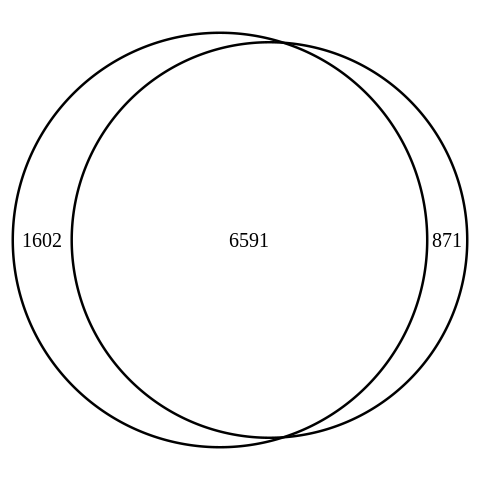

In [9]:
options(repr.plot.width=4, repr.plot.height=4)
draw.pairwise.venn(
    area1 = beta_wT %>% pull(ID) %>% length(),
    area2 = beta_wF %>% pull(ID) %>% length(),
    cross.area = intersect(
        beta_wT %>% pull(ID), 
        beta_wF %>% pull(ID)
    ) %>% length()

)


In [10]:
bind_rows(
    beta_wF %>% count_csq() %>% mutate(weighted=F),
    beta_wT %>% count_csq() %>% mutate(weighted=T)
) %>%
spread(weighted, n)


Csq,FALSE,TRUE
<chr>,<int>,<int>
Others,7864,6295
PAVs,319,1055
PTVs,10,112


In [11]:
p_LDL <- bind_rows(
    beta_wF %>% count_csq() %>% mutate(weighted=F),
    beta_wT %>% count_csq() %>% mutate(weighted=T)
) %>%
plot_csq_cnt() +
labs(title='LDL cholesterol (INI30780)')


In [12]:
ggsave('beta.count.LDL.png', p_LDL)


Saving 6.67 x 6.67 in image


In [13]:
GBE_ID <- 'HC382'

beta_wT <- file.path(data_d, sprintf('%s_weightedT', GBE_ID), 'snpnet.tsv') %>% fread()
beta_wF <- file.path(data_d, sprintf('%s_weightedF', GBE_ID), 'snpnet.tsv') %>% fread()


(polygon[GRID.polygon.88], polygon[GRID.polygon.89], polygon[GRID.polygon.90], polygon[GRID.polygon.91], text[GRID.text.92], text[GRID.text.93], text[GRID.text.94], text[GRID.text.95], text[GRID.text.96]) 

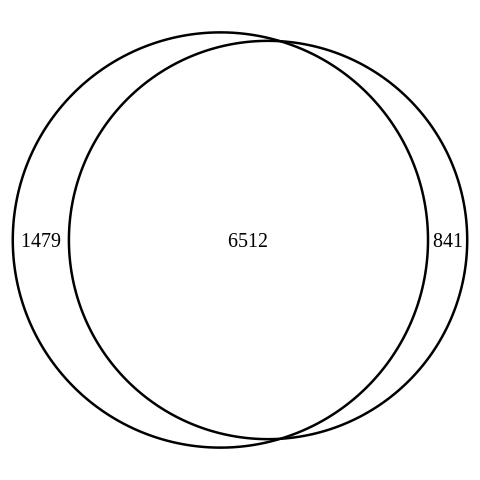

In [14]:
options(repr.plot.width=4, repr.plot.height=4)
draw.pairwise.venn(
    area1 = beta_wT %>% pull(ID) %>% length(),
    area2 = beta_wF %>% pull(ID) %>% length(),
    cross.area = intersect(
        beta_wT %>% pull(ID), 
        beta_wF %>% pull(ID)
    ) %>% length()

)


In [15]:
bind_rows(
    beta_wF %>% count_csq() %>% mutate(weighted=F),
    beta_wT %>% count_csq() %>% mutate(weighted=T)
) %>%
spread(weighted, n)


Csq,FALSE,TRUE
<chr>,<int>,<int>
Others,7731,6289
PAVs,252,922
PTVs,8,142


In [16]:
p_Asthma <- bind_rows(
    beta_wF %>% count_csq() %>% mutate(weighted=F),
    beta_wT %>% count_csq() %>% mutate(weighted=T)
) %>%
plot_csq_cnt() +
labs(title='Asthma (HC382)')


In [17]:
ggsave('beta.count.Asthma.png', p_Asthma)


Saving 6.67 x 6.67 in image
